# Project: TMDb Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling1">Data Wrangling (1)</a></li>
<li><a href="#cleaning1">Data Cleaning (1)</a></li>
<li><a href="#eda1">Exploratory Data Analysis (1)</a></li>
<li><a href="#cleaning2">Data Cleaning (2)</a></li>
<li><a href="#wrangling2">Data Wrangling (2)</a></li>
<li><a href="#eda2">Exploratory Data Analysis (2)</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#conclusions">References</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, I am going to analyze dataset belongs to movies. I will try to answer the following questions:
1) Which genre is most common from 2010 to 2015?
<br>
2) What is behavior profit from 2010 to 2015 in average?
<br>
3) What is the proportion of movies longer than 100 mins?


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

-------
--------

<a id='wrangling1'></a>
## Data Wrangling (1)


### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape

(10866, 21)

> There are
> - 10866 Rows
> - 21 Columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

> In first look:
> - No problems with data types
> - There are many unneeded columns:
    * imdb_id
    * homepage
    * tagline
    * overview
    * release_date
    * budget_adj
    * revenue_adj
    
> Note: I don't know what's different between budget and budget_adj & revenue and revenue_adj. So, I am dealing with budget and revenue.

In [5]:
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

> To know how many null values in each column

In [6]:
df.duplicated().sum()

1

> There is 1 duplicate row

In [7]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


1) When we look at `min`, there is 0 values (Not Acceptable and affect in other statistics measures) in some rows at
> - budget
> - revenue	
> - runtime
> - budget_adj
> - revenue_adj

2) 50% (Q2) of values is 0 in:
> - revenue	
> - runtime
> - budget_adj
> - revenue_adj

----------------
----------------

<a id='Cleaning1'></a>
## Data Cleaning (1)

### Copy Dataset

In [8]:
df_clean = df.copy()

### Make id as index

In [10]:
df_clean.set_index('id', inplace=True)

### Drop Unneeded Columns

In [11]:
print(df_clean.shape)
print(df_clean.columns)
df_clean.drop(['imdb_id', 'homepage', 'tagline', 'overview', 'release_date', 'budget_adj', 'revenue_adj'], axis=1,inplace=True)

(10866, 20)
Index(['imdb_id', 'popularity', 'budget', 'revenue', 'original_title', 'cast',
       'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime',
       'genres', 'production_companies', 'release_date', 'vote_count',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')


In [12]:
print(df_clean.columns)
df_clean.shape

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'keywords', 'runtime', 'genres', 'production_companies', 'vote_count',
       'vote_average', 'release_year'],
      dtype='object')


(10866, 13)

### Drop Duplicated Rows


In [13]:
sum(df_clean.duplicated())

1

In [14]:
print(df_clean.shape[0])
df_clean.drop_duplicates(inplace=True)
print(df_clean.shape[0])

10866
10865


In [15]:
sum(df_clean.duplicated())

0

### Handling Missing Values

In [16]:
df_clean.isna().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
dtype: int64

---
Drop rows which have null in `keywords`

In [17]:
df_clean = df_clean[~df_clean['keywords'].isna()]

In [18]:
df_clean.isna().sum()

popularity                0
budget                    0
revenue                   0
original_title            0
cast                     45
director                 16
keywords                  0
runtime                   0
genres                    5
production_companies    667
vote_count                0
vote_average              0
release_year              0
dtype: int64

---
Drop rows which have null in `production_companies`

In [19]:
df_clean = df_clean[~df_clean['production_companies'].isna()]

In [20]:
df_clean.isna().sum()

popularity               0
budget                   0
revenue                  0
original_title           0
cast                    25
director                10
keywords                 0
runtime                  0
genres                   4
production_companies     0
vote_count               0
vote_average             0
release_year             0
dtype: int64

---
Drop rows which have null in `cast`

In [21]:
df_clean = df_clean[~df_clean['cast'].isna()]

In [22]:
df_clean.isna().sum()

popularity               0
budget                   0
revenue                  0
original_title           0
cast                     0
director                10
keywords                 0
runtime                  0
genres                   4
production_companies     0
vote_count               0
vote_average             0
release_year             0
dtype: int64

---
Drop rows which have null in `genres`

In [23]:
df_clean = df_clean[~df_clean['genres'].isna()]

In [24]:
df_clean.isna().sum()

popularity               0
budget                   0
revenue                  0
original_title           0
cast                     0
director                10
keywords                 0
runtime                  0
genres                   0
production_companies     0
vote_count               0
vote_average             0
release_year             0
dtype: int64

---
`director`: There is only 10 null value, and we can easly get `director` for a movie

In [27]:
director_mask = df_clean[df_clean['director'].isna()].copy()
director_mask

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year
id,,,,,,,,,,,,,
320996,0.126594,0,0,Iliza Shlesinger: Freezing Hot,Iliza Shlesinger,NaN,stand-up|stand up comedy|aftercreditsstinger|d...,71,Comedy,New Wave Entertainment,14,6.6,2015
355131,0.108072,0,0,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,sexuality|superhuman|superpower|making of|soci...,25,Documentary|Science Fiction,Netflix,12,7.5,2015
321160,0.100910,0,0,With This Ring,Regina Hall|Jill Scott|Eve|Brooklyn Sudano|Dei...,NaN,wedding,105,Comedy|Romance,Lifetime Television|Sony Pictures Television,14,6.5,2015
259910,0.291253,0,0,Marvel Studios: Assembling a Universe,Robert Downey Jr.|Chris Hemsworth|Chris Evans|...,NaN,superhero|marvel cinematic universe,43,TV Movie|Documentary,Marvel Studios|ABC Studios,32,6.3,2014
256561,0.119891,150000,0,Free to Play,Benedict Lim|Danil Ishutin|Clinton Loomis,NaN,competition|video game|esports|dota 2,75,Documentary,Valve,40,7.0,2014
133365,0.256703,0,0,The Diary of Anne Frank,Ellie Kendrick|Kate Ashfield|Geoff Breton|Feli...,NaN,diary|anne frank|jewish|girl|nazi occupation,100,Drama,Darlow Smithson Productions|British Broadcasti...,19,7.5,2009
284019,0.168210,0,0,Phineas and Ferb: Mission Marvel,Vincent Martella|Thomas Brodie-Sangster|Ashley...,NaN,marvel comic|superhero,44,Action|Adventure|Science Fiction,Disney Television Animation,13,5.9,2013
25565,0.040311,0,0,Transformers: Beginnings,Peter Cullen|Frank Welker|Mark Ryan|Patrick Ha...,NaN,transformers|giant robot|robot|transforming ro...,22,Animation|Action|Thriller|Science Fiction,DreamWorks Home Entertainment,34,5.8,2007
225804,0.118854,0,0,The Making of 'The Nightmare Before Christmas',Mike Belzer|Tim Burton|Bonita DeCarlo|Greg Dyk...,NaN,behind the scenes|stop motion animation|animat...,25,Documentary,Buena Vista Home Entertainment,15,7.5,1993


In my search on google:

id | original_title | director
--- | --- | ---
320996 | George Harrison |  George Harrison
355131 | Sense8: Creating the World | Josh Oreck \| Lana Wachowski
321160 | With This Ring | Nzingha Stewart
259910 | Marvel Studios: Assembling a Universe | N/A
256561 | Free to Play | Valve Company
133365 | The Diary of Anne Frank | George Stevens
284019 | Phineas and Ferb: Mission Marvel |  Robert F. Hughes \| Sue Perrotto
25565 | Transformers: Beginnings | Harold Hayes Jr. \| Craig Phillips \| Michael White Jr. 
225804 | The Making of 'The Nightmare Before Christmas' | Henry Selick
34038 | Magical Mystery Tour | The Beatles

I'll drop the row with `id = 259910` that has unknown director

In [32]:
df_clean.loc[259910]

popularity                                                       0.291253
budget                                                                  0
revenue                                                                 0
original_title                      Marvel Studios: Assembling a Universe
cast                    Robert Downey Jr.|Chris Hemsworth|Chris Evans|...
director                                                              NaN
keywords                              superhero|marvel cinematic universe
runtime                                                                43
genres                                               TV Movie|Documentary
production_companies                           Marvel Studios|ABC Studios
vote_count                                                             32
vote_average                                                          6.3
release_year                                                         2014
Name: 259910, dtype: object

In [42]:
df_clean = df_clean.drop(259910)

Fill `director` null values 

In [44]:
def fill_directors (df: pd.DataFrame, id_director: dict):
    for id in id_director:
        df.at[id,'director'] = id_director.get(id)

In [45]:
id_director = {
    320996 : 'George Harrison',
    355131 : 'Josh Oreck | Lana Wachowski' ,
    321160 : 'Nzingha Stewart' ,
    256561 :'Valve Company' ,
    133365 :'George Stevens' ,
    284019 : 'Robert F. Hughes | Sue Perrotto' ,
    25565 : 'Harold Hayes Jr. | Craig Phillips | Michael White Jr.' ,
    225804 : 'Henry Selick',
    34038 : 'The Beatles',
}

In [46]:
fill_directors (df_clean, id_director)

In [47]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8675 entries, 135397 to 22293
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            8675 non-null   float64
 1   budget                8675 non-null   int64  
 2   revenue               8675 non-null   int64  
 3   original_title        8675 non-null   object 
 4   cast                  8675 non-null   object 
 5   director              8675 non-null   object 
 6   keywords              8675 non-null   object 
 7   runtime               8675 non-null   int64  
 8   genres                8675 non-null   object 
 9   production_companies  8675 non-null   object 
 10  vote_count            8675 non-null   int64  
 11  vote_average          8675 non-null   float64
 12  release_year          8675 non-null   int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.2+ MB


In [48]:
df_clean.isnull().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
keywords                0
runtime                 0
genres                  0
production_companies    0
vote_count              0
vote_average            0
release_year            0
dtype: int64

<a id='eda1'></a>
## Exploratory Data Analysis (1)


In [49]:
df_clean.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,8675.000000,8.675000e+03,8.675000e+03,8675.000000,8675.000000,8675.000000,8675.000000
mean,0.741300,1.769102e+07,4.919754e+07,103.767608,263.951009,6.004311,2000.135216
std,1.087274,3.356103e+07,1.288958e+08,26.252897,634.915121,0.893617,13.224426
min,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,0.249420,0.000000e+00,0.000000e+00,91.000000,20.000000,5.500000,1993.000000
50%,0.449041,1.400000e+06,1.730660e+05,100.000000,54.000000,6.100000,2004.000000
75%,0.841944,2.100000e+07,3.883704e+07,113.000000,199.000000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.700000,2015.000000


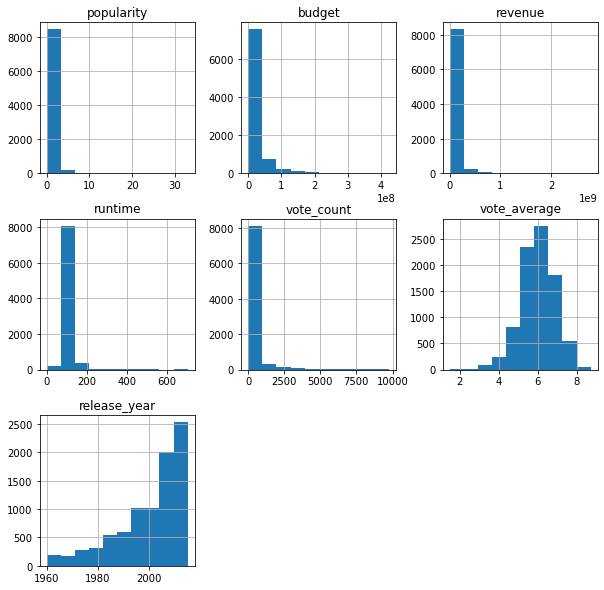

In [50]:
df_clean.hist(figsize=(10,10));

When we look at `min`, there is 0 values (Not Acceptable and affect in other statistics measures) in some rows at
> - budget
> - revenue	
> - runtime

In [51]:
df_clean[df_clean['budget'] == 0].count()

popularity              3948
budget                  3948
revenue                 3948
original_title          3948
cast                    3948
director                3948
keywords                3948
runtime                 3948
genres                  3948
production_companies    3948
vote_count              3948
vote_average            3948
release_year            3948
dtype: int64

In [52]:
df_clean[df_clean['revenue'] == 0].count()

popularity              4139
budget                  4139
revenue                 4139
original_title          4139
cast                    4139
director                4139
keywords                4139
runtime                 4139
genres                  4139
production_companies    4139
vote_count              4139
vote_average            4139
release_year            4139
dtype: int64

In [53]:
df_clean[df_clean['runtime'] == 0].count()

popularity              7
budget                  7
revenue                 7
original_title          7
cast                    7
director                7
keywords                7
runtime                 7
genres                  7
production_companies    7
vote_count              7
vote_average            7
release_year            7
dtype: int64

<a id='cleaning2'></a>
## Data Cleaning (2)

### Handling Missing Values

In [54]:
df_clean.shape

(8675, 13)

In [55]:
df_clean = df_clean[df_clean['budget'] != 0]
df_clean = df_clean[df_clean['revenue'] != 0]
df_clean = df_clean[df_clean['runtime'] != 0]

In [56]:
df_clean.shape

(3677, 13)

<a id='wrangling2'></a>
## Data Wrangling (2)

### Create Profit Column

In [57]:
df_clean['profit'] = df_clean['revenue'] - df_clean['budget']

In [58]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3677 entries, 135397 to 2161
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            3677 non-null   float64
 1   budget                3677 non-null   int64  
 2   revenue               3677 non-null   int64  
 3   original_title        3677 non-null   object 
 4   cast                  3677 non-null   object 
 5   director              3677 non-null   object 
 6   keywords              3677 non-null   object 
 7   runtime               3677 non-null   int64  
 8   genres                3677 non-null   object 
 9   production_companies  3677 non-null   object 
 10  vote_count            3677 non-null   int64  
 11  vote_average          3677 non-null   float64
 12  release_year          3677 non-null   int64  
 13  profit                3677 non-null   int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 430.9+ KB


In [59]:
df_clean.head()

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,profit
id,,,,,,,,,,,,,,
135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1363528810
76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,228436354
262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,185238201
140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1868178225
168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1316249360


<a id='eda2'></a>
## Exploratory Data Analysis (2)

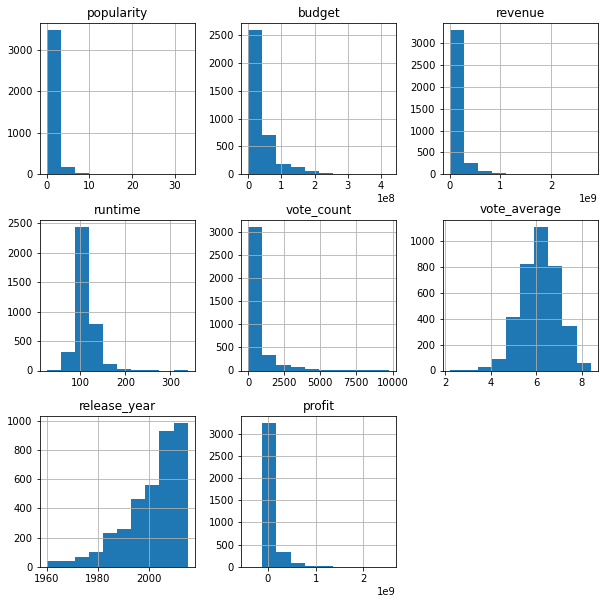

In [60]:
df_clean.hist(figsize=(10,10));

-----

### Research Question 1: Which genre is most common from 2010 to 2015?

In [61]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
years = np.arange(2010, 2016)
print(years)
type(years)

[2010 2011 2012 2013 2014 2015]


numpy.ndarray

In [62]:
def popular_genres(df: pd.DataFrame, years_list: np.ndarray):
    most_popular_genres = pd.DataFrame(columns = ['genre', 'year'])
    for year in years_list:
        tmp_df = df[df['release_year'] == year].copy()
        for id in tmp_df.index:
            genres = list(tmp_df.loc[id]['genres'].split("|"))
            for genre in genres:
                most_popular_genres = pd.concat([most_popular_genres, pd.DataFrame.from_records([{'genre': genre, 'year': year}])], ignore_index=True)
    
    # print(f'shape of df is: {most_popular_genres.shape}')
    return most_popular_genres.copy()

In [63]:
popular_genres = popular_genres(df_clean, years)
popular_genres.head()

,genre,year
0,Action,2010
1,Thriller,2010
2,Science Fiction,2010
3,Mystery,2010
4,Adventure,2010


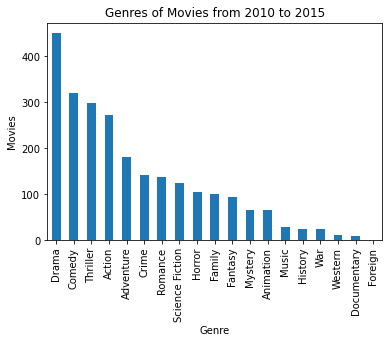

In [64]:
popular_genres['genre'].value_counts().plot(kind='bar');
plt.title('Genres of Movies from 2010 to 2015')
plt.xlabel('Genre')
plt.ylabel('Movies')
plt.show()

> Between 2010 and 2015, there were about 450 movies in the `drama` genre.

---

### Research Question 2: What is behavior profit from 2010 to 2015 in average?

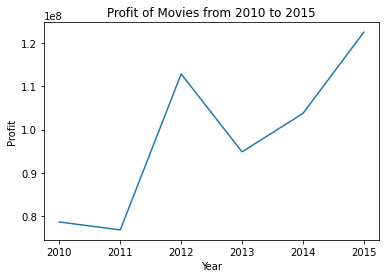

In [65]:
profit_over_years = df_clean[df_clean['release_year'] >= 2010]
profit_over_years.groupby('release_year')['profit'].mean().plot();
plt.title('Profit of Movies from 2010 to 2015')
plt.xlabel('Year')
plt.ylabel('Profit')

plt.show()

> From 2010 to 2013, profits fluctuated, but after 2013, they seem to be increasing.

---

### Research Question 3: What is the proportion of movies longer than 100 mins?

In [66]:
less_than_hundred = df_clean[df_clean['runtime'] <= 100].count()
less_than_hundred[1]

1393

In [67]:
more_than_hundred = df_clean[df_clean['runtime'] > 100].count()
more_than_hundred[1]

2284

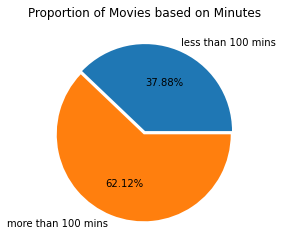

In [69]:
data = [less_than_hundred[1], more_than_hundred[1]]
labels = ['less than 100 mins', 'more than 100 mins']
plt.pie(data, labels = labels , autopct="%1.2f%%", explode = [0,0.04])
plt.title('Proportion of Movies based on Minutes')
plt.show()

> About 62% of movies are longer than 100 minutes, and about 38% are shorter.

---
---

## Save Clean Dataset

In [70]:
df_clean.to_csv('clean_tmdb_movies.csv',index=False)

---
---

<a id='conclusions'></a>
## Conclusions

In this project I faced many issues but I solve it. When you face issue and solve it, here you learn.
<br>

After working for a long time, I finally answered the questions mentioned in my introduction:
1) Which genre is most common from 2010 to 2015?
> Between 2010 and 2015, drama genre is most common by about 450 movies.
<br>

2) What is behavior profit from 2010 to 2015 in average?
> From 2010 to 2013, profits fluctuated, but after 2013, they seem to be increasing.

3) What is the proportion of movies longer than 100 mins?
> About 62% of movies are longer than 100 minutes, and about 38% are shorter.

### Limitations

1) The dataset contains missing values that easy can get it such `director`. <br>
2) There are many rows contains missing values, the original file contains (10866) rows, and the cleaned file contains (3677) rows. That means there are (7189) rows has been dropped. <br>
3) The separator | is good idea to put many values in one cell, but dealing with it is not convenient. 

<a id='References'></a>
## References
[How to drop rows in Pandas DataFrame by index labels?](https://www.geeksforgeeks.org/how-to-drop-rows-in-pandas-dataframe-by-index-labels/)
<br>
[How to assign value in DataFrame](https://dataindependent.com/pandas/pandas-set-dataframe-values-at-iat/)
<br>
[Loop Dictionary](https://www.youtube.com/watch?v=9JJDDKj_tGA)
<br>
[Program to convert String to a List](https://www.geeksforgeeks.org/python-program-convert-string-list/)
<br>
[Good alternative to Pandas .append() method, now that it is being deprecated?](https://stackoverflow.com/questions/70837397/good-alternative-to-pandas-append-method-now-that-it-is-being-deprecated)